In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<p><div class="text-justify"> Для определения градиента температуры по толщине смазочного слоя рассмотрим краевую задачу на основе одномерного уравнения теплопроводности с применением численного метода. Пусть температура в направлении Ox считается постоянной, при допущении, что теплофизические характеристики не зависят от температуры. <div></p>

Дифференциальное уравнение теплопроводности Фурье примет следующий вид:
     $$ \frac{\partial \theta}{\partial t} =  a\frac{\partial ^ 2 \theta}{\partial z ^ 2}, (a = const > 0),(1)$$
где $\theta$ – температура смазочного слоя, a – температуропроводность смазочного слоя.

Начальные и граничные условия запишутся следующим образом:
 $$ t = 0:\theta(z,0) = 0,  0 > z > H; (2)$$
 $$ z = 0: -\lambda \frac{\partial \theta}{\partial z} =  \alpha \tau v_{0} (1 -\frac{z}{H}),  t > 0; (3)$$
 $$ z = H: \theta(\infty,t) = 20, (3)$$
 
где $\alpha$ – коэффициент распределения теплоты между смазкой и вращающейся со скоростью $v_{0}$ поверхности, $\lambda$ - теплопроводность смазочного слоя, H - зазор, $\tau$ - напряжение сдвига смазочного слоя. 

Были выбраны следующие режимы работы пары трения: коэффициент распределения теплоты между смазкой составляет 0.5, скорость скольжения 0.266 м/с, зазор между образцами  - $2 \cdot 10 ^ {-6}$, нагрузка на образец варьируется от 72 до 200 Н. Амплитуда перемещения составляет 80 мм.Теплофизические свойства смазочного материала: $\rho$=911 $\frac{кг}{м^3}$, $c = 2037 \frac{Дж}{кг\cdot\circ С}$. Теплопроводность моторного масла $\lambda_{м.м.}$ составляет 0.134 $\frac{Вт}{м\cdot\circ С}$, теплопроводность фуллерена $С_{60}$ - 0,2 $\frac{Вт}{м\cdot\circ С}$. Концентрация фуллерена $\varphi$ в моторном масле изменяется от 0,1 до 2.  Продолжительность одного испытания составляет 1 час. 

Теплопроводность смазочной композиции с фуллеренами $\lambda$ вычислим следующим образом:
$$\lambda = \lambda_{м.м.}+ \lambda_{С_{60}} \cdot \varphi, (4)$$
где $\lambda_{м.м.}$ - теплопроводность моторного масла, теплопроводность фуллерена $С_{60}$, $\varphi$ - концентрация фуллерена $С_{60}$ в моторном масле.

In [2]:
DISTANCE_TRAVELLED = 0.08 
NODE = 500 
ALFA_COEFFICIENT = 0.5
#SPEED = 0.266
CLEARANCE = 2e-6
COORDINATE = 1.9e-6
TIME = 3600
HEAT_CAPACITY = 2037
DENCITY = 911
AREA = 6.4e-04

Для численного решения задачи разобьем смазку по толщине на $N-1$ равных промежутков, т.е. построим конечно-разностную сетку (рис. 1):
  <img src="images/Nodes.png" width="300">
<center>Рисунок – 1. Конечно–разностная сетка:
$z_{2},z_{3},…,z_{N-1}$ – координаты внутренних узлов; $z_{1},z_{N}$ – координаты граничных узлов


Определим значение температуры в $i$ – ом узле в момент времени $t = t_{n} = n \cdot k$ как $\theta(z_{i},t_{n} )=\theta_{i}^n.$ Здесь $k$ – шаг интегрирования по временной координате,   – номер шага по времени.
Далее заменим дифференциальные операторы в (1) на их конечно – разностные аналоги. Будем пользоваться неявной схемой:


Далее заменим дифференциальные операторы в (1) на их конечно – разностные аналоги. Будем пользоваться неявной схемой:
$$ \frac{\partial \theta}{\partial t} = \frac{\theta_{i}^ {n+1} - \theta_{i}^ {n}}{k},$$
$$ \frac{\partial ^ 2 \theta}{\partial z ^ 2} = \frac{\theta_{i+1}^ {n+1} - \theta_{i}^ {n+1} + \theta_{i-1}^ {n+1}}{h ^ 2}, (5)$$


В результате аппроксимации частных производных соответствующими конечными разностями получаем следующую систему линейных алгебраических уравнений (СЛАУ):

$$\rho c \frac{\theta_{i}^ {n+1} - \theta_{i}^ {n}}{k} = \lambda (\frac{\theta_{i+1}^ {n+1} - \theta_{i}^ {n+1} + \theta_{i-1}^ {n+1}}{h ^ 2}), i = 2,...,N-1, n\geq0.  (6)  $$ 

Полученную систему можно свести к наиболее общему виду:

$$ A_{i}\theta_{i+1}^ {n+1} - B_{i}\theta_{i}^ {n+1} + C_{i}\theta_{i-1}^ {n+1} = F_{i}, (7)$$
где $A_{i} = C_{i} =\frac{\lambda}{h^2}$, $B_{i} = 2\frac{\lambda}{h^2} + \frac{\rho c}{k}$, $F_{i} = -\frac{\rho c}{k}\theta_{i}^ {n} $. 

Уравнения (7) называются трехточными разностными уравнениями второго порядка. Система (7) имеет трехдиагональную структуру, поэтому рассматриваем нестационарную задачу. Такую систему необходимо решать на каждом шаге по времени. 
Предположим, что существуют такие наборы чисел $ \alpha_{i}$ и $\beta_{i}$ $(i = \overline{1,N-1}),$ при которых 

$$\theta_{i}^ {n+1} =  \alpha_{i}\theta_{i+1}^ {n+1} + \beta_{i}, (8)$$

т.е. система уравнений (7) преобразуется в двухточечное уравнение первого порядка (8). Выражение (8) подставив в уравнение (7) получаем: 
$$\theta_{i}^ {n+1} = \frac{A_{i}}{B_{i} - C_{i}\alpha_{i-1}}\theta_{i+1}^ {n+1} + \frac{C_{i}\beta_{i-1} - F_{i}}{B_{i} - C_{i}\alpha_{i-1}}. (9)$$

Последнее равенство имеет вид (9), если при $i=2,3,…,N-1$ всех выполняются соотношения 
$$\alpha_{i} = \frac{A_{i}}{B_{i} - C_{i}\alpha_{i-1}},  \beta_{i} = \frac{C_{i}\beta_{i-1} - F_{i}}{B_{i} - C_{i}\alpha_{i-1}}. (10)$$

Для определения $\alpha_{i}$ и $\beta_{i}$ по (10) необходимо знать $\alpha_{1}$ и $\alpha_{1}$, которые находятся из левого граничного условия.
Разложим функцию $\theta(z)$ в ряд Тейлора в окрестности точки $z=0$ до членов второго порядка относительно $h$:

$$\theta_{2}^ {n+1} =  \theta_{1}^ {n+1} + h\frac{\partial\theta}{\partial z}\bigg|_{z=0}^{n+1} + h^2\frac{\partial ^ 2 \theta}{\partial z ^ 2}\bigg|_{z=0}^{n+1}.    $$

Используя соотношение (1) получим:
$$\theta_{2}^ {n+1} =  \theta_{1}^ {n+1} + h\frac{\partial\theta}{\partial z}\bigg|_{z=0}^{n+1} + \frac{h^2}{2a}\frac{\partial \theta}{\partial t}\bigg|_{z=0}^{n+1};    $$
$$\frac{\partial\theta}{\partial z}\bigg|_{z=0}^{n+1} = \frac{1}{h} \theta_{2}^ {n+1} - \theta_{1}^ {n+1} - \frac{h}{2a}\frac{\partial \theta}{\partial t}\bigg|_{z=0}^{n+1} =  \frac{\alpha \tau v_{0}}{\lambda} (1 -\frac{z}{H}).   $$

Тогда $$\theta_{1}^ {n+1} = \frac{2ak}{2ak+h^2}\theta_{2}^ {n+1} + \frac{h^2}{2ak+h^2}\theta_{1}^ {n} + \frac{2\alpha \tau v_{0}hak}{\lambda(2ak+h^2)} (1 -\frac{z}{H}). $$

Таким образом,
$$\alpha_{1} = \frac{2ak}{2ak+h^2},$$
$$\beta_{1} = \frac{h^2}{2ak+h^2}\theta_{1}^ {n} + \frac{2\alpha \tau v_{0}hak}{\lambda(2ak+h^2)} (1 -\frac{z}{H}).$$

На правой границе температура $$\theta|_{z=H} = 20. $$

In [3]:
def get_gradient_temperature(concentration, force, speed):
    shear_stresses = force / AREA
    thermal_conductivity = 0.134 + 0.2 * concentration
    thermal_diffusivity = thermal_conductivity / (HEAT_CAPACITY * DENCITY)
    space_increment = DISTANCE_TRAVELLED / (10 * (NODE - 1))
    time_step = TIME / 100.0
# ==========
    T = np.ones(NODE) 
    alfa = np.zeros(NODE)
    beta = np.zeros(NODE)
    T[0] = 0
    t = 0
    while t < TIME:
        alfa[0] = (2 * thermal_diffusivity * time_step)/(2 * thermal_diffusivity * time_step + space_increment * space_increment)
        beta[0] = (space_increment*space_increment*T[0])/(
            2*thermal_diffusivity*time_step+space_increment*space_increment)+(
            2*thermal_diffusivity*shear_stresses*space_increment*ALFA_COEFFICIENT*speed*time_step*(1-COORDINATE / CLEARANCE))/(
            thermal_conductivity*(2*thermal_diffusivity*time_step+space_increment*space_increment))
        for i in range(1, NODE-2):
            ai = thermal_conductivity / (space_increment * space_increment)
            ci = thermal_conductivity / (space_increment * space_increment)
            bi = 2 * thermal_conductivity / (space_increment * space_increment) + HEAT_CAPACITY * DENCITY / time_step
            fi = - HEAT_CAPACITY * DENCITY * T[i] / time_step
            alfa[i] = ai / (bi - ci * alfa[i - 1])
            beta[i] = (ci * beta[i-1] - fi) / (bi - ci * alfa[i-1])
        T[NODE-1] = 20
        for i in range (NODE-2, 0, -1):
            T[i] = alfa[i] * T[i+1] + beta[i]
        t = t + time_step
    return np.mean(T)

In [4]:
concentration = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 2]
force_small = [72, 112, 200]

In [5]:
df = []
for i in concentration:
    for j in force_small:
        df.append(get_gradient_temperature(i, j, 0.266))

In [6]:
filename = 'd.json'
with open(filename, 'w') as f:
    json.dump(df, f)

In [12]:
df_1 = []
df_2 = []
df_3 = []
df_4 = []
df_5 = []
df_6 = []
df_7 = []
df_8 = []
df_9 = []
df_10 = []
df_11 = []
df_12 = []
for i in concentration:
    df_1.append(get_gradient_temperature(i, 72, 0.266))
    df_2.append(get_gradient_temperature(i, 112, 0.266))
    df_3.append(get_gradient_temperature(i, 200, 0.266))
    df_4.append(get_gradient_temperature(i, 72, 0.5))
    df_5.append(get_gradient_temperature(i, 112, 0.5))
    df_6.append(get_gradient_temperature(i, 200, 0.5))
    df_7.append(get_gradient_temperature(i, 300, 0.266))
    df_8.append(get_gradient_temperature(i, 400, 0.266))
    df_9.append(get_gradient_temperature(i, 500, 0.266))
    df_10.append(get_gradient_temperature(i, 300, 0.5))
    df_11.append(get_gradient_temperature(i, 400, 0.5))
    df_12.append(get_gradient_temperature(i, 500, 0.5))

In [13]:
d_1 = {
    'Concentration': concentration,
    'Temperature (force = 72 H)': df_1,
    'Temperature (force = 112 H)': df_2,
    'Temperature (force = 200 H)': df_3
}
data_1 = pd.DataFrame(data=d_1)
data_1

,Concentration,Temperature (force = 72 H),Temperature (force = 112 H),Temperature (force = 200 H)
0,0.1,18.911964,29.396382,52.462101
1,0.2,16.783312,26.085151,46.549195
2,0.3,15.086101,23.445046,41.834724
3,0.4,13.701282,21.290883,37.988005
4,0.5,12.549886,19.499823,34.789684
5,0.6,11.577486,17.987201,32.088573
6,0.7,10.745353,16.692772,29.777092
7,0.8,10.025179,15.572501,27.776609
8,0.9,9.395793,14.593456,26.028314
9,1.0,8.841045,13.730515,24.487348


In [14]:
d_2 = {
    'Concentration': concentration,
    'Temperature (force = 72 H)': df_4,
    'Temperature (force = 112 H)': df_5,
    'Temperature (force = 200 H)': df_6
}
data_2 = pd.DataFrame(data=d_2)
data_2

,Concentration,Temperature (force = 72 H),Temperature (force = 112 H),Temperature (force = 200 H)
0,0.1,35.513606,55.221159,98.577774
1,0.2,31.512389,48.997048,87.463297
2,0.3,28.322144,44.034446,78.601511
3,0.4,25.719101,39.985268,71.370836
4,0.5,23.554824,36.618615,65.358955
5,0.6,21.727004,33.775340,60.281678
6,0.7,20.162844,31.342202,55.936790
7,0.8,18.809134,29.236430,52.176482
8,0.9,17.626077,27.396120,48.890214
9,1.0,16.583318,25.774051,45.993662


In [15]:
d_3 = {
    'Concentration': concentration,
    'Temperature (force = 300 H)': df_7,
    'Temperature (force = 400 H)': df_8,
    'Temperature (force = 500 H)': df_9
}
data_3 = pd.DataFrame(data=d_3)
data_3

,Concentration,Temperature (force = 300 H),Temperature (force = 400 H),Temperature (force = 500 H)
0,0.1,78.673146,104.884191,131.095236
1,0.2,69.803791,93.058388,116.312984
2,0.3,62.732086,83.629447,104.526809
3,0.4,56.962007,75.936010,94.910012
4,0.5,52.164526,69.539368,86.914210
5,0.6,48.112859,64.137146,80.161432
6,0.7,44.645638,59.514185,74.382731
7,0.8,41.644913,55.513217,69.381522
8,0.9,39.022471,52.016628,65.010785
9,1.0,36.711022,48.934696,61.158371


In [16]:
d_4 = {
    'Concentration': concentration,
    'Temperature (force = 300 H)': df_10,
    'Temperature (force = 400 H)': df_11,
    'Temperature (force = 500 H)': df_12
}
data_4 = pd.DataFrame(data=d_4)
data_4

,Concentration,Temperature (force = 300 H),Temperature (force = 400 H),Temperature (force = 500 H)
0,0.1,147.846655,197.115537,246.384418
1,0.2,131.174944,174.886591,218.598237
2,0.3,117.882265,157.163020,196.443775
3,0.4,107.036254,142.701672,178.367090
4,0.5,98.018432,130.677909,163.337387
5,0.6,90.402518,120.523357,150.644196
6,0.7,83.885185,111.833580,139.781975
7,0.8,78.244724,104.312965,130.381206
8,0.9,73.315322,97.740429,122.165536
9,1.0,68.970493,91.947324,114.924155


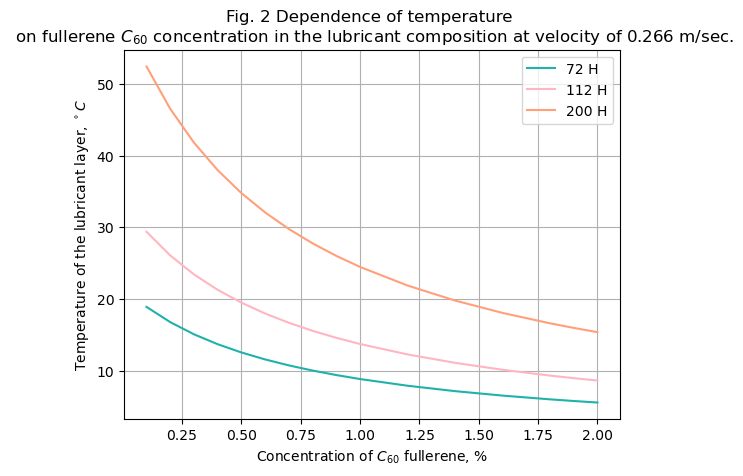

In [17]:
plt.plot(data_1['Concentration'], data_1['Temperature (force = 72 H)'], label='72 H', color='lightseagreen');
plt.plot(data_1['Concentration'], data_1['Temperature (force = 112 H)'], label='112 H', color='lightpink');
plt.plot(data_1['Concentration'], data_1['Temperature (force = 200 H)'], label='200 H', color='lightsalmon');
plt.title('Fig. 2 Dependence of temperature \n on fullerene $C_{60}$ concentration in the lubricant composition at velocity of 0.266 m/sec.')
plt.xlabel('Concentration of $C_{60}$ fullerene, %')
plt.ylabel('Temperature of the lubricant layer, $^\circ С$')
plt.grid();
plt.legend();
plt.savefig('images/velocity_0.266.png')
    

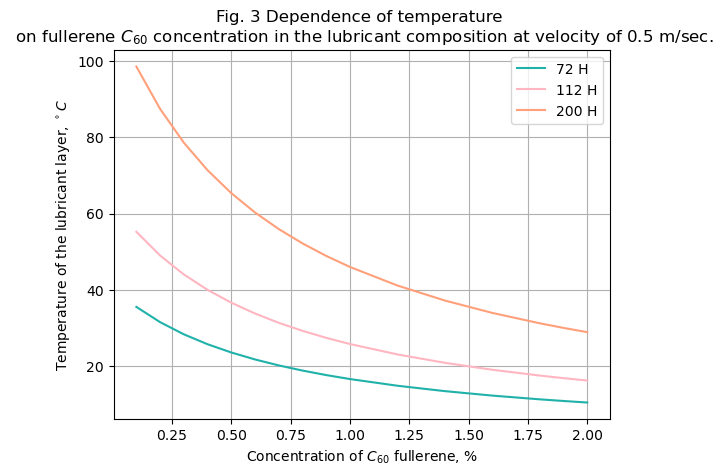

In [18]:
plt.plot(data_2['Concentration'], data_2['Temperature (force = 72 H)'], label='72 H', color='lightseagreen');
plt.plot(data_2['Concentration'], data_2['Temperature (force = 112 H)'], label='112 H', color='lightpink');
plt.plot(data_2['Concentration'], data_2['Temperature (force = 200 H)'], label='200 H', color='lightsalmon');
plt.title('Fig. 3 Dependence of temperature \n on fullerene $C_{60}$ concentration in the lubricant composition at velocity of 0.5 m/sec.')
plt.xlabel('Concentration of $C_{60}$ fullerene, %')
plt.ylabel('Temperature of the lubricant layer, $^\circ С$')
plt.grid();
plt.legend();
plt.savefig('images/velocity_0.5_small_force.png')
    

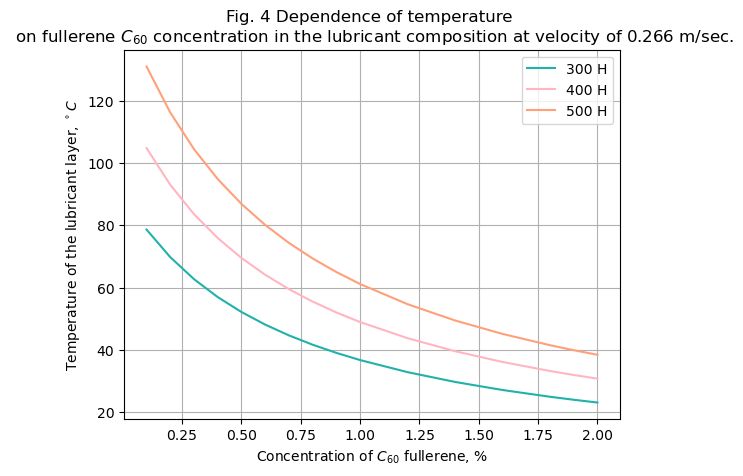

In [19]:
plt.plot(data_3['Concentration'], data_3['Temperature (force = 300 H)'], label='300 H', color='lightseagreen');
plt.plot(data_3['Concentration'], data_3['Temperature (force = 400 H)'], label='400 H', color='lightpink');
plt.plot(data_3['Concentration'], data_3['Temperature (force = 500 H)'], label='500 H', color='lightsalmon');
plt.title('Fig. 4 Dependence of temperature \n on fullerene $C_{60}$ concentration in the lubricant composition at velocity of 0.266 m/sec.')
plt.xlabel('Concentration of $C_{60}$ fullerene, %')
plt.ylabel('Temperature of the lubricant layer, $^\circ С$')
plt.grid();
plt.legend();
plt.savefig('images/velocity_0.5_big_force.png')

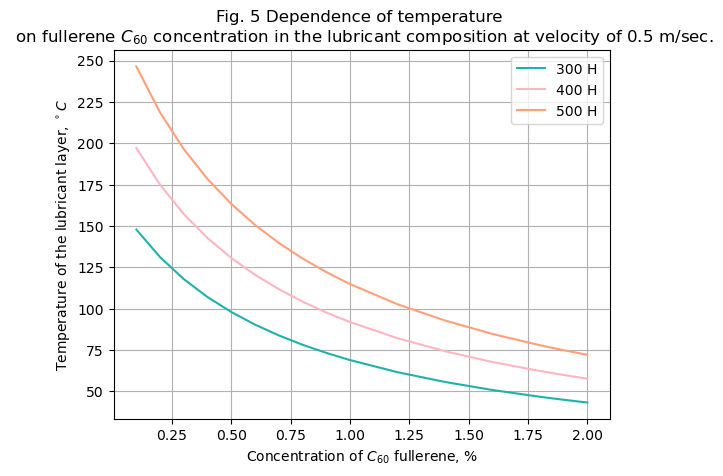

In [21]:
plt.plot(data_4['Concentration'], data_4['Temperature (force = 300 H)'], label='300 H', color='lightseagreen');
plt.plot(data_4['Concentration'], data_4['Temperature (force = 400 H)'], label='400 H', color='lightpink');
plt.plot(data_4['Concentration'], data_4['Temperature (force = 500 H)'], label='500 H', color='lightsalmon');
plt.title('Fig. 5 Dependence of temperature \n on fullerene $C_{60}$ concentration in the lubricant composition at velocity of 0.5 m/sec.')
plt.xlabel('Concentration of $C_{60}$ fullerene, %')
plt.ylabel('Temperature of the lubricant layer, $^\circ С$')
plt.grid();
plt.legend();
plt.savefig('images/velocity_0.5_big_force.png')